In [1]:
import sys
import numpy as np
import torch
import pandas as pd
import cv2
import matplotlib.pyplot
from matplotlib import pyplot as plt

In [2]:
!conda info


     active environment : py39
    active env location : /root/anaconda3/envs/py39
            shell level : 2
       user config file : /root/.condarc
 populated config files : /root/.condarc
          conda version : 4.13.0
    conda-build version : not installed
         python version : 3.10.4.final.0
       virtual packages : __cuda=11.0=0
                          __linux=4.4.0=0
                          __glibc=2.23=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /root/anaconda3  (writable)
      conda av data dir : /root/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : http://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/pytorch/linux-64
                          http://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/pytorch/noarch
                          http://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main/linux-64
                          http://mirrors.tuna.tsinghua.edu.cn/anaconda/pk

In [3]:
!conda list opencv

# packages in environment at /root/anaconda3/envs/py39:
#
# Name                    Version                   Build  Channel
libopencv                 4.5.1            py39hf3c14e0_0    conda-forge
opencv                    4.5.1            py39hf3d152e_0    conda-forge
py-opencv                 4.5.1            py39hef51801_0    conda-forge


## 提取关键点

In [4]:
img = cv2.imread(r"./input/img/lenna.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
# 新建 sift 算子
sift = cv2.xfeatures2d.SIFT_create()
# 寻找特征点与特征点周围的特征向量
key_points, descriptor = sift.detectAndCompute(img_gray, None)

[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1612623483813/work/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [6]:
descriptor

array([[ 0.,  1.,  0., ...,  0.,  0.,  6.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [86., 36.,  0., ...,  1.,  0.,  0.],
       ...,
       [66.,  5.,  2., ...,  0.,  0.,  0.],
       [44.,  0.,  0., ...,  0.,  0., 24.],
       [ 3.,  0.,  3., ...,  0.,  0., 11.]], dtype=float32)

In [7]:
img_plot = cv2.drawKeypoints(image=img, outImage=img, keypoints=key_points, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(51, 163, 236))

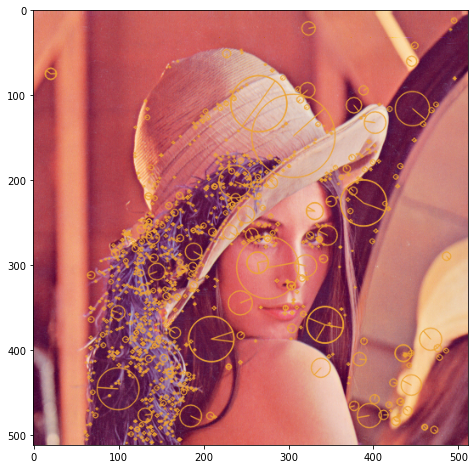

In [8]:
# # cv2.imshow("sift keypoints", img_plot)
plt.figure(figsize=(12,8))
plt.imshow(img_plot[:, :, ::-1])

## 特征匹配

In [9]:
img_box = cv2.imread(r"./input/img/box.png", 0)
img_box_in_scene = cv2.imread(r"./input/img/box_in_scene.png", 0)

In [10]:
sift = cv2.xfeatures2d.SIFT_create()
box_key_points, box_descriptor = sift.detectAndCompute(img_box, None)
box_in_scene_key_point, box_in_scene_descriptor = sift.detectAndCompute(img_box_in_scene, None)

In [11]:
# 创建 BF 对象
bf = cv2.BFMatcher(cv2.NORM_L2)
matchers = bf.knnMatch(box_descriptor, box_in_scene_descriptor, k=2)

good_matchers = list()
for m, n in matchers:
    if m.distance < 0.5*n.distance:
        good_matchers.extend([[m]])

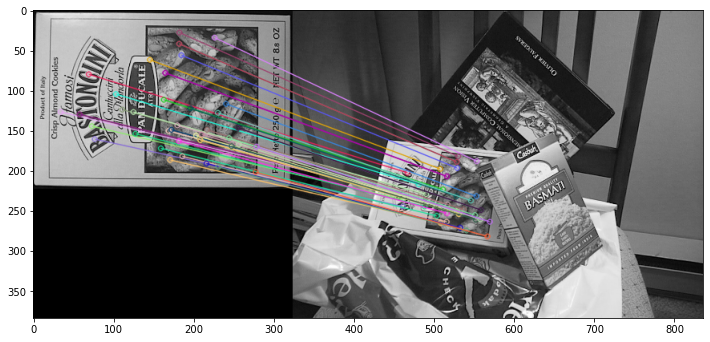

In [12]:
img_matches_knn = cv2.drawMatchesKnn(img_box, box_key_points, img_box_in_scene, box_in_scene_key_point, good_matchers, None, flags=2)
plt.figure(figsize=(12,8))
plt.imshow(img_matches_knn)